In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
plt.style.use('fivethirtyeight')
from matplotlib import rc

plt.rc('text', usetex=True)
plt.rc('font', family='sans')

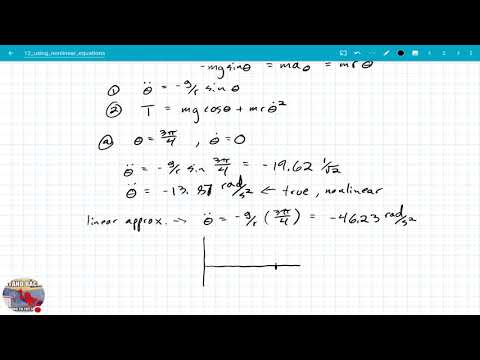

In [2]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('fcx9jR0O0rY')

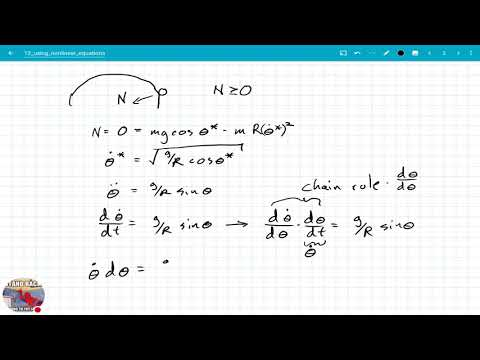

In [4]:
YouTubeVideo('QcENiGydyF0')

# Nonlinear pendulum solution

The first solution to the pendulum was to _linearize_ the equation of motion using a [Taylor series](https://mathworld.wolfram.com/TaylorSeries.html) expansion. As you look at engineering systems, this is __always__ the best first estimate for a problem. Linear solutions are much easier to solve and usually its _good enough_ to make a plan. 

_If you have a linear solution, but want the nonlinear solution_ then you can approach this in two ways

1. use a different integration or equation e.g. work-energy
2. numerically integrate the equations of motion

## Using work-energy for the pendulum 

The motion of the pendulum must obey the work-energy. Add potential and kinetic energy you have

$T_0 + V_0 = T(t) + V(t)$

- The kinetic energy is $T = 1/2mv^2 = 1/2mL^2\dot{\theta}^2$
- the potential energy is $V = mgh = mgL(1 - \cos\theta)$
- initial kinetic energy (if starting from rest) is $T_0=0$
- initial potential energy is $V_0 = mgL(1 - \cos\theta_0)$

So you can solve for $\dot{\theta} = f(\theta)$

$\dot{\theta} = \pm \sqrt{\frac{2g}{L}(\cos\theta - \cos\theta_0)}$

> __Note__: This is the _same_ solution derived in the video by using integration by parts. $\frac{d\dot{\theta}}{dt} = -\frac{g}{L}\sin\theta \rightarrow \frac{d\dot{\theta}}{d\theta}\frac{d\theta}{dt} = -\frac{g}{L}\sin\theta$. The work-energy formula is a shortcut to integrating an equation of motion by parts. 

Below, you can see the angular velocity as a function of angle for a L=0.5 m pendulum released at $\theta_0 = 90^o = \pi/2~rad$. 

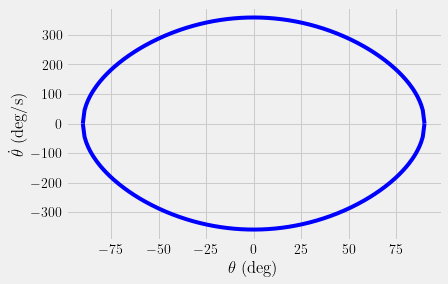

In [122]:
L = 0.5
theta = np.linspace(-np.pi/2, np.pi/2, 200)
dtheta = np.sqrt(2*9.81/L*(np.cos(theta) - np.cos(np.pi/2)))
plt.plot(theta*180/np.pi, dtheta*180/np.pi, 'b-')
plt.plot(theta*180/np.pi, -dtheta*180/np.pi, 'b-')
# plt.axis('equal')
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel(r'$\dot{\theta}$ (deg/s)');

### Phase plot of the simple pendulum

This type of plot is called a [phase plot](https://en.wikipedia.org/wiki/Phase_portrait). You can use it to compare different initial conditions and stability. Extending this phase plot to account for initial angles, $\theta_0 = (18^o...180^o)$, you see the concentric circles move outward (from light to dark) with higher speeds. 

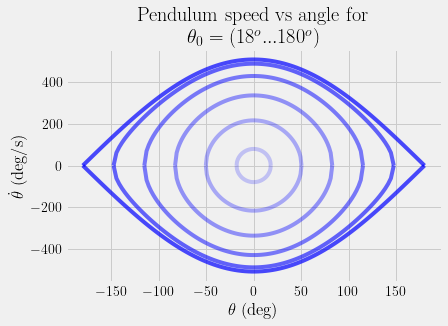

In [73]:
opacity = 0
for theta0 in np.linspace(np.pi/10, np.pi, 6):
    theta = np.linspace(-theta0, theta0, 100)
    dtheta = np.sqrt(2*9.81/L*(np.cos(theta) - np.cos(theta0)))
    plt.plot(theta*180/np.pi, dtheta*180/np.pi, '-', color = (0, 0, 1, 0.2+opacity))
    plt.plot(theta*180/np.pi, -dtheta*180/np.pi, '-', color = (0, 0, 1, 0.2+opacity))
    opacity += 0.1
plt.title('Pendulum speed vs angle for\n'+
          r'$\theta_0=(18^o...180^o)$')
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel(r'$\dot{\theta}$ (deg/s)');

## Numerical integration

The phase plot can be used for a number of engineering analyses. It tells you the maximum and minimum speeds and displacements for the pendulum, how fast the system is moving at given location, etc. It _does not_ tell you what $\theta(t)$ is. If you have a nonlinear equation of motion and you need the solution for $\theta(t)$, you have to use a _numerical integration_. 

Numerical integration only works on first order differential equations. The idea behind the integration is that if you know the current value and you know how quickly it changes, then you can estimate the next value

$next~value = current~value + \frac{d~value}{dt}*\Delta t$

Here, you will separate the second order differential equation, 

$\ddot{\theta} = -\frac{g}{L}\sin\theta$

into 2 first-order differential equations

1. $\frac{d\theta}{dt} = \dot{\theta}$
2. $\frac{d\dot{\theta}}{dt} = -\frac{g}{L}\sin\theta$

Now, you have 2 differential equations and one _state_ varible, $\mathbf{x} = [\theta,~\dot{\theta}]$. 

1. $\frac{dx_1}{dt} = x_2$
2. $\frac{d x_2}{dt} = -\frac{g}{L}\sin x_1$


In [74]:
g = 9.81
L = 0.5
def pendulum(t, x):
    '''pendulum equations of motion for theta and dtheta/dt
    arguments
    ---------
    t: current time
    x: current state variable [theta, dtheta/dt]
    outputs
    -------
    dx: current derivative of state variable [dtheta/dt, ddtheta/ddt]'''
    
    dx = np.zeros(len(x))
    dx[0] = x[1]
    dx[1] = -g/L*np.sin(x[0])
    return dx

The SciPy function [`solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) can now be used to integrate `pendulum` and plot the solutions below. You can use a `for-loop` to generate multiple solutions on one graph to compare results. Below, the solutions are plotted for $\theta_0 = (18^o...180^o)$. 

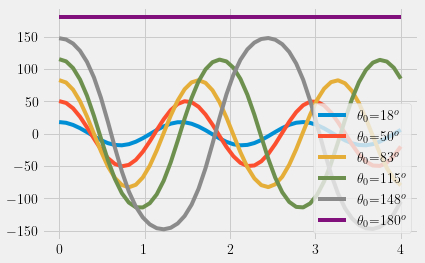

In [121]:
from scipy.integrate import solve_ivp

for theta0 in np.linspace(np.pi/10, np.pi, 6):
    sol = solve_ivp(pendulum, [0, 4], [theta0, 0], t_eval=np.linspace(0, 4))
    plt.plot(sol.t, sol.y[0]*180/np.pi, label = r'$\theta_0$={:1.0f}$^o$'.format(theta0*180/np.pi))

plt.legend(loc = 'lower right')

Notice in the graphs how the time period changes depending upon initial angle, $\theta_0$. You may have experienced this first hand if you have played on a swingset. Initially, you need to pump your legs quickly to get started, but then as you swing higher, you spend more time between pumps. 

>__Note__: What happens at the $\theta_0 = 180^o$? Why is it constant?

## Wrapping up

In this notebook, you used two techniques to solve the nonlinear pendulum equation of motion

1. work-energy formula _which is equivalent to integrating by parts_
2. numerical integration using `solve_ivp`

You can use either of these techniques for _any_ engineering system. Similarly, you can always linearize an equation of motion so you don't need to use nonlinear solutions. Just keep in mind, a linearized solution will introduce error in your model results. 